## Input Parameters


In [253]:
import random
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd  # Import pandas for CSV writing

BOARD_SIZE = 100
LADDER_LENGTH = 5  # Fixed ladder length
SNAKE_LENGTH = 5   # Fixed snake length
num_snakes = 10  
num_ladders = 10 

In [254]:
def generate_board(num_snakes, num_ladders):
    snakes_and_ladders = {}
    iterations = 0

    while True:
        iterations += 1

        # Generate potential ladder and snake start positions
        potential_ladders = random.sample(range(1, BOARD_SIZE - LADDER_LENGTH), num_ladders)
        potential_snakes = random.sample(range(SNAKE_LENGTH + 1, BOARD_SIZE), num_snakes)

        # Create ladders and snakes, ensuring no overlaps
        for ladder_start in potential_ladders:
            ladder_end = ladder_start + LADDER_LENGTH
            if ladder_end not in snakes_and_ladders:
                snakes_and_ladders[ladder_start] = ladder_end

        for snake_start in potential_snakes:
            snake_end = snake_start - SNAKE_LENGTH
            if snake_end not in snakes_and_ladders:
                snakes_and_ladders[snake_start] = snake_end

        # Check for overlaps and resolve if necessary
        overlaps = [pos for pos in snakes_and_ladders if list(snakes_and_ladders.values()).count(pos) > 1]
        if not overlaps:
            break  # No overlaps, valid board

        for overlap in overlaps:
            if random.random() < 0.5:  # 50% chance to remove snake
                snake_start = [key for key, value in snakes_and_ladders.items() if value == overlap and key > overlap][0]
                del snakes_and_ladders[snake_start]
            else:  # 50% chance to remove ladder
                ladder_start = [key for key, value in snakes_and_ladders.items() if value == overlap and key < overlap][0]
                del snakes_and_ladders[ladder_start]

    print(f"Board generated in {iterations} iterations.")
    return snakes_and_ladders


In [255]:
# Game Logic (remains the same)
def play_game(snakes_and_ladders):
    position = 0
    moves = 0
    
    # Uses the System Random Number Generator instead of the python static seeded one 
    while position < BOARD_SIZE:
        dice_roll = random.SystemRandom().randint(1, 6) 
        position += dice_roll
        moves += 1
        
        if position in snakes_and_ladders:
            position = snakes_and_ladders[position]
        
        if position > BOARD_SIZE:
            position = BOARD_SIZE
    
    return moves

In [256]:
# Simulation Function (updated to take snakes_and_ladders as input)
def run_simulations(num_simulations, snakes_and_ladders):
    game_times = []
    for i in range(num_simulations):
        game_times.append(play_game(snakes_and_ladders))  # Pass snakes_and_ladders here
    return game_times

In [257]:
# Function for individual distribution plots
def plot_individual_distributions(game_time_distributions, num_snakes_list, num_ladders_list):
    # Matplotlib subplots for individual distributions in one figure
    fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(15, 8))  # Adjust nrows, ncols based on num_boards
    fig.suptitle('Individual Snakes and Ladders Game Times Distributions')

    for i, ax in enumerate(axes.flatten()):
        if i < len(game_time_distributions):
            ax.hist(game_time_distributions[i], bins=30, edgecolor='black')
            ax.set_title(f'Snakes/Ladders: {num_snakes_list[i]}/{num_ladders_list[i]}')
            ax.set_xlabel('Number of Moves')
            ax.set_ylabel('Frequency')
        else:
            ax.axis('off')  # Hide unused subplots if fewer than 10 boards

    plt.tight_layout()  # Adjust spacing between subplots
    plt.show()

In [258]:
# Function for stacked plot
def plot_stacked_distribution(game_time_distributions, num_snakes_list, num_ladders_list):
    plt.figure(figsize=(10, 6))
    bins = np.linspace(0, 200, 50)  # Adjust the range and bin size as needed

    for i, game_times in enumerate(game_time_distributions):
        plt.hist(game_times, bins=bins, alpha=0.5, label=f'Board {i+1} (Snakes: {num_snakes_list[i]}, Ladders: {num_ladders_list[i]})')

    plt.title('Comparison of Game Time Distributions Across Different Boards')
    plt.xlabel('Number of Moves')
    plt.ylabel('Frequency')
    plt.legend(loc='upper right')
    plt.show()

In [259]:
# Function for plot of average game times
def plot_average_game_times(average_game_times, num_snakes_list, num_ladders_list):
    plt.figure(figsize=(10, 6))
    plt.plot(average_game_times, 'o-')
    plt.xticks(range(len(average_game_times)), [f'Board {i+1}' for i in range(len(average_game_times))])
    plt.title('Average Game Times Across Different Boards')
    plt.xlabel('Board Number')
    plt.ylabel('Average Number of Moves')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

In [260]:
# Function to save game times to CSV
def save_game_times_to_csv(game_time_distributions, num_snakes, num_ladders, snake_length, ladder_length):
    # Combine data into a pandas DataFrame for easy saving
    data = pd.DataFrame(game_time_distributions).T
    data.columns = [f'Board {i+1}' for i in range(len(game_time_distributions))]

    # Create a descriptive filename based on the game configuration
    filename = f"snakes_{num_snakes}_ladders_{num_ladders}_snake_len_{snake_length}_ladder_len_{ladder_length}.csv"
    data.to_csv(filename, index=False)
    print(f"Game times saved to {filename}")


Board generated in 1 iterations.
Board generated in 1 iterations.
Board generated in 1 iterations.
Board generated in 1 iterations.
Board generated in 1 iterations.
Board generated in 1 iterations.
Board generated in 1 iterations.
Board generated in 1 iterations.
Board generated in 1 iterations.
Board generated in 1 iterations.


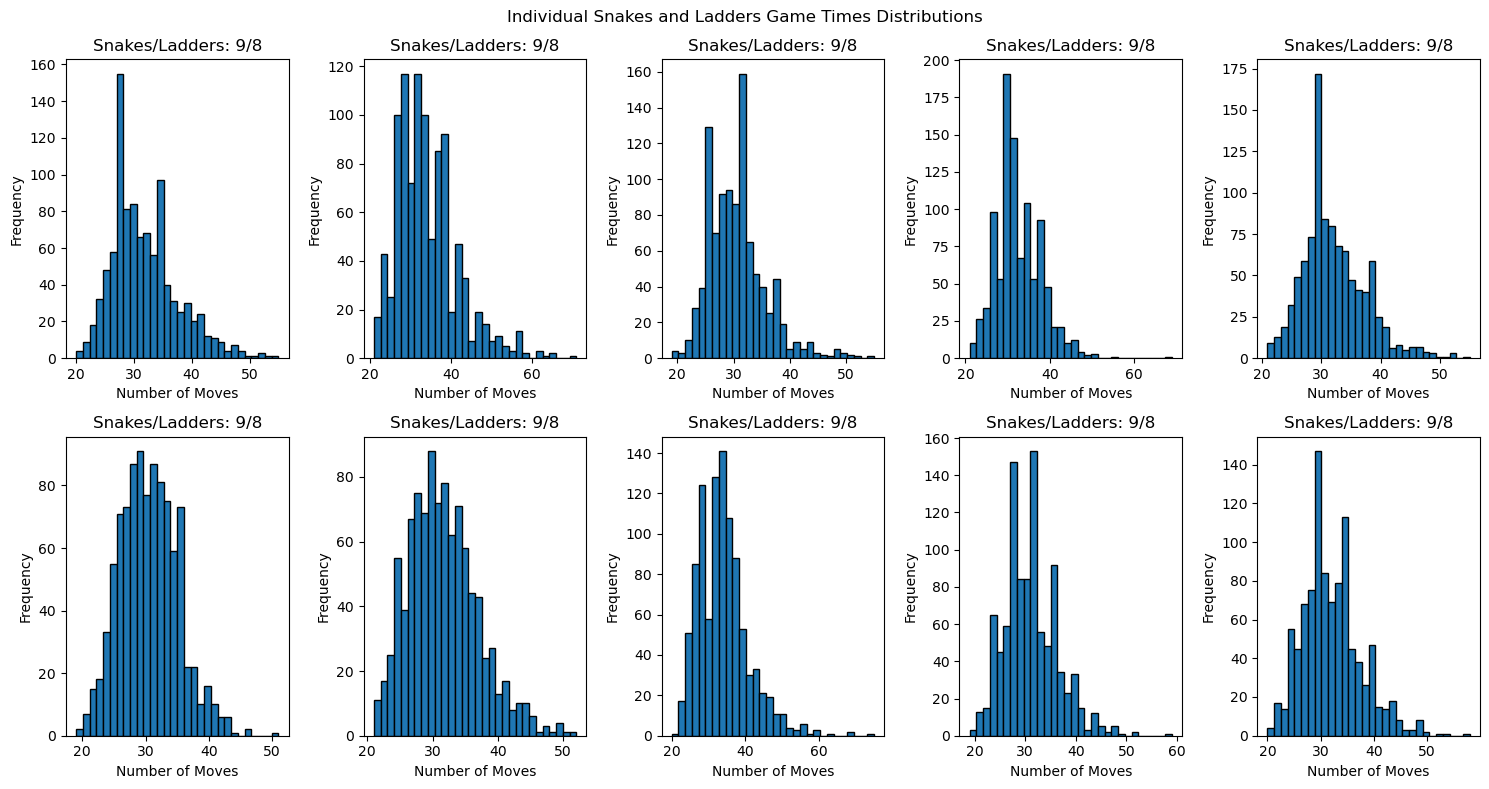

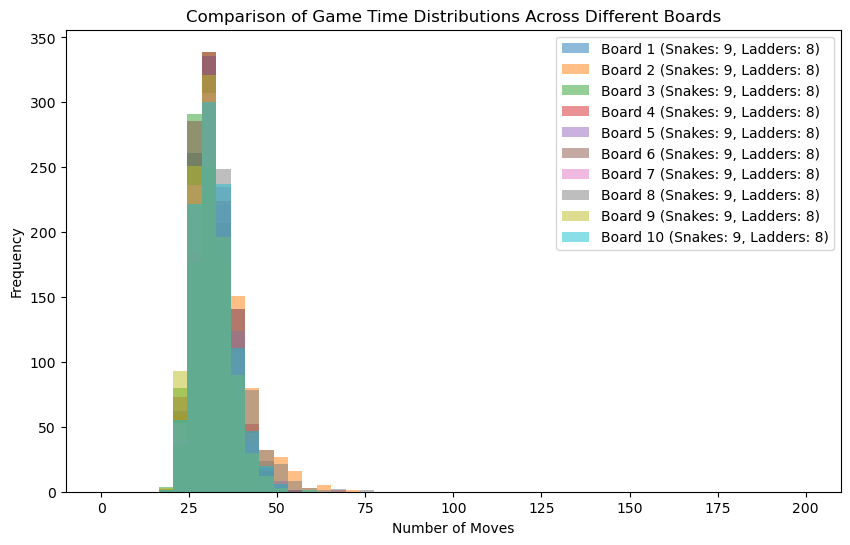

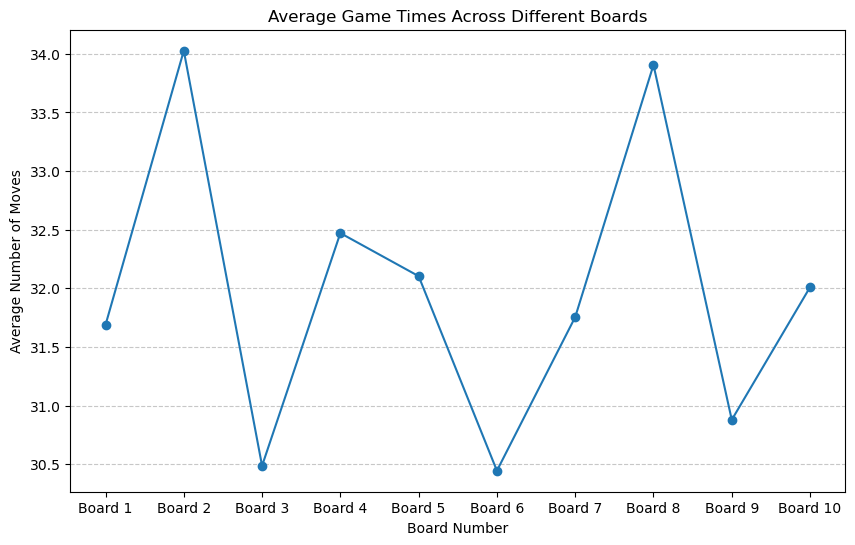

Game times saved to snakes_9_ladders_8_snake_len_5_ladder_len_5.csv
Overall average game time across all simulations: 31.98 moves


In [261]:
# Main execution
num_simulations = 1000
num_boards = 10  # Adjust for number of board configurations

average_times = []
num_snakes_list = []
num_ladders_list = []
game_time_distributions = []  # For tracking game time distributions

for _ in range(num_boards):
    snakes_and_ladders = generate_board(num_snakes, num_ladders)
    game_times = run_simulations(num_simulations, snakes_and_ladders)
    
    game_time_distributions.append(game_times)  # Track all distributions
    average_times.append(np.mean(game_times))  # Track averages
    num_snakes_list.append(num_snakes)
    num_ladders_list.append(num_ladders)

# Plot individual distributions for each board
plot_individual_distributions(game_time_distributions, num_snakes_list, num_ladders_list)

# Plot stacked distributions for comparison
plot_stacked_distribution(game_time_distributions, num_snakes_list, num_ladders_list)

# Plot overall average game times
plot_average_game_times(average_times, num_snakes_list, num_ladders_list)

# Save game times to CSV file
save_game_times_to_csv(game_time_distributions, num_snakes, num_ladders, SNAKE_LENGTH, LADDER_LENGTH)

# Print overall average game time
overall_average = np.mean(average_times)
print(f"Overall average game time across all simulations: {overall_average:.2f} moves")

## Output
